# INFRARED SPECTROSCOPY

In [1]:
%load_ext autoreload
%autoreload 2
%cd ../..

/Users/esgalu/Documents/maestria_unal/phosphorene_research


## Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

## Path

In [3]:
PRINCIPAL_PATH = 'data'
IR_PATH = os.path.join(PRINCIPAL_PATH, '20210914 IR')

In [4]:
list_name_files = [
    file for file in os.listdir(IR_PATH) 
    if file[-3:] == 'dpt'
]
PATH_FILES = [
    os.path.join(IR_PATH, file) for file in list_name_files
]

## Function

In [5]:
def read_dpt_ir_files(path):
    df = pd.read_csv(path, header=None)
    df.columns = ['wavenumber', 'intensity']
    df.set_index('wavenumber', inplace=True)
    return df

## Core

### Read files

In [6]:
dic_df = {}

for path_ir_files in PATH_FILES:
    dic_df[path_ir_files] = read_dpt_ir_files(path_ir_files)

In [7]:
background_path = 'data/20210914 IR/Background.0.dpt'

In [8]:
PATH_FILES.remove(background_path)

### Transform Data

In [9]:
dic_df[background_path].rename(
    columns={'intensity':'intensity_bg'},
    inplace=True)

In [10]:
for path_ir_files in PATH_FILES:
    dic_df[path_ir_files] = pd.concat(
        [dic_df[path_ir_files], 
         dic_df[background_path]],
        axis=1)
    
    dic_df[path_ir_files][f'intensity_{path_ir_files[17:-4]}'] = (
        dic_df[path_ir_files]['intensity'] - 
        dic_df[path_ir_files]['intensity_bg'])
    
    dic_df[path_ir_files].drop(
        columns=['intensity', 'intensity_bg'],
        inplace=True)
    
_ = dic_df.pop('data/20210914 IR/Background.0.dpt')

In [11]:
dic_df = pd.concat(dic_df.values(), axis=1)

### General Plot

<AxesSubplot:xlabel='WAVENUMBER [cm-1]', ylabel='U.A'>

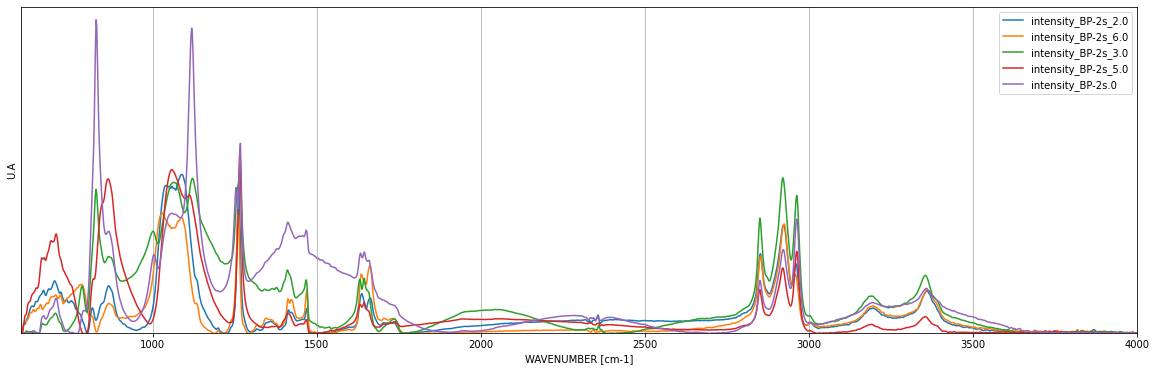

In [14]:
dic_df.plot(
    figsize=(20, 6),
    kind='line',
    xlim=(599, 4000),
    ylim=(0, 1.3),
    grid=True,
    xlabel='WAVENUMBER [cm-1]',
    ylabel='U.A',
    #colormap='jet',
    yticks = []
)

### Subplots

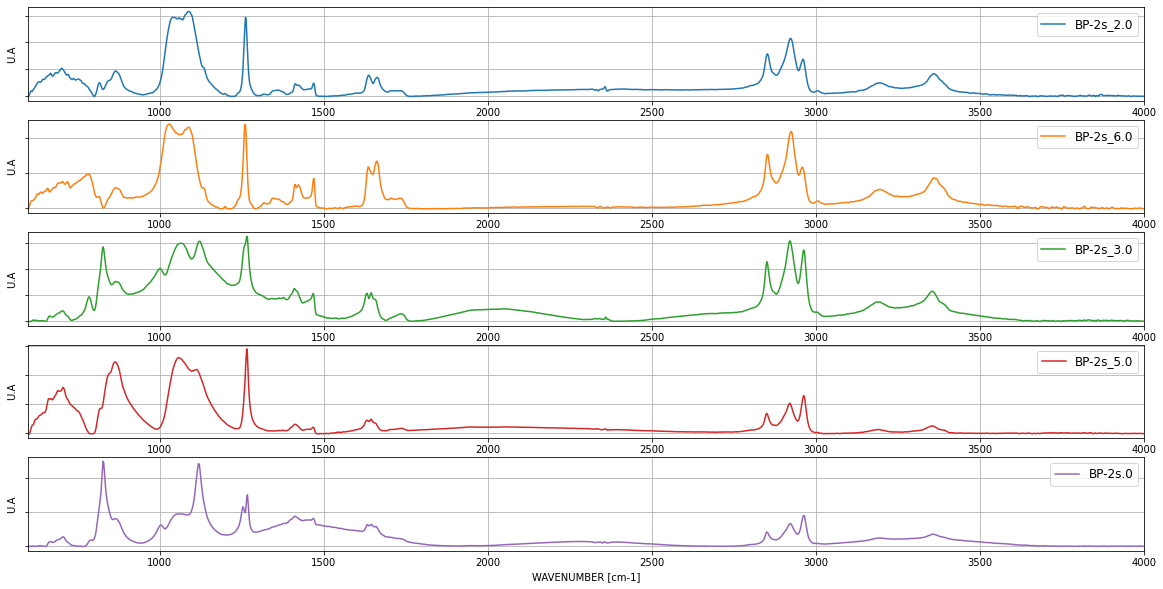

In [15]:
colors = plt.rcParams["axes.prop_cycle"]()
fig, ax = plt.subplots(figsize=(20, 10),
                       nrows=len(dic_df.columns))

for index_, measure in enumerate(dic_df.columns):
    c = next(colors)["color"]
    
    ax[index_].plot(dic_df.index, 
            dic_df[measure],
            label=measure[10:],
            color=c)
    ax[index_].invert_xaxis()
    ax[index_].set_xlim(599, 4000)
    ax[index_].legend(fontsize=12)
    ax[index_].grid(True)
    ax[index_].set_ylabel('U.A')
    ax[index_].set_xlabel('WAVENUMBER [cm-1]')
    ax[index_].set_yticklabels([])